In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


In [2]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val_err = [1.0 - i for i in history.history['val_acc']]
    err = [1.0- i for i in history.history['acc']] 
    val = plt.plot(history.epoch, val_err,
                   '--', label=name.title()+' Validation')
    plt.plot(history.epoch, err, color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()

  plt.xlim([0,max(history.epoch)])

# Base model

In [3]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.4880 - acc: 0.8050 - binary_crossentropy: 0.4880 - val_loss: 0.3436 - val_acc: 0.8734 - val_binary_crossentropy: 0.3436
Epoch 2/20
 - 2s - loss: 0.2541 - acc: 0.9097 - binary_crossentropy: 0.2541 - val_loss: 0.2852 - val_acc: 0.8875 - val_binary_crossentropy: 0.2852
Epoch 3/20
 - 2s - loss: 0.1862 - acc: 0.9350 - binary_crossentropy: 0.1862 - val_loss: 0.2873 - val_acc: 0.8864 - val_binary_crossentropy: 0.2873
Epoch 4/20
 - 2s - loss: 0.1484 - acc: 0.9490 - binary_crossentropy: 0.1484 - val_loss: 0.3091 - val_acc: 0.8803 - val_binary_crossentropy: 0.3091
Epoch 5/20
 - 2s - loss: 0.1217 - acc: 0.9605 - binary_crossentropy: 0.1217 - val_loss: 0.3368 - val_acc: 0.8740 - val_binary_crossentropy: 0.3368
Epoch 6/20
 - 2s - loss: 0.0990 - acc: 0.9696 - binary_crossentropy: 0.0990 - val_loss: 0.3686 - val_acc: 0.8704 - val_binary_crossentropy: 0.3686
Epoch 7/20
 - 2s - loss: 0.0793 - acc: 0.9770 - binary_crossentropy:

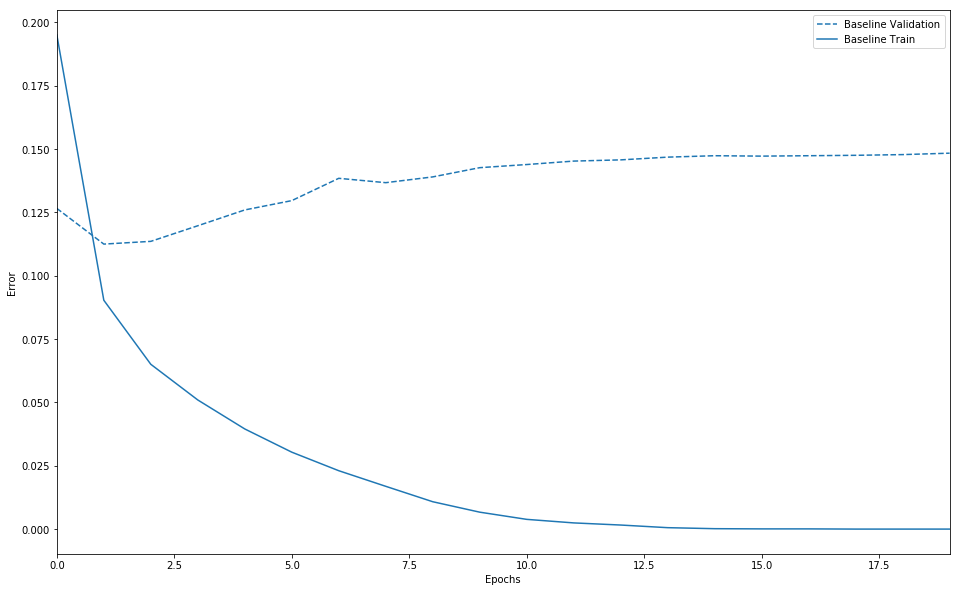

In [5]:
plot_history([('baseline', baseline_history)])


# The effect of the number of parameters

If the model has too many parameters, then it can overfit.  We should ensure we have enough parameters to capture the features, but not so much that it will fit the error.

In [6]:
smaller_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6072 - acc: 0.6828 - binary_crossentropy: 0.6072 - val_loss: 0.5426 - val_acc: 0.7858 - val_binary_crossentropy: 0.5426
Epoch 2/20
 - 2s - loss: 0.4942 - acc: 0.8426 - binary_crossentropy: 0.4942 - val_loss: 0.4931 - val_acc: 0.8510 - val_binary_crossentropy: 0.4931
Epoch 3/20
 - 2s - loss: 0.4458 - acc: 0.8883 - binary_crossentropy: 0.4458 - val_loss: 0.4681 - val_acc: 0.8585 - val_binary_crossentropy: 0.4681
Epoch 4/20
 - 2s - loss: 0.4125 - acc: 0.9115 - binary_crossentropy: 0.4125 - val_loss: 0.4535 - val_acc: 0.8654 - val_binary_crossentropy: 0.4535
Epoch 5/20
 - 2s - loss: 0.3862 - acc: 0.9272 - binary_crossentropy: 0.3862 - val_loss: 0.4487 - val_acc: 0.8589 - val_binary_crossentropy: 0.4487
Epoch 6/20
 - 2s - loss: 0.3636 - acc: 0.9398 - binary_crossentropy: 0.3636 - val_loss: 0.4381 - val_acc: 0.8672 - val_binary_crossentropy: 0.4381
Epoch 7/20
 - 2s - loss: 0.3437 - acc: 0.9492 - binary_crossentropy:

In [8]:
larger_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

larger_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

larger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
larger_history = larger_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.3963 - acc: 0.8360 - binary_crossentropy: 0.3963 - val_loss: 0.2844 - val_acc: 0.8862 - val_binary_crossentropy: 0.2844
Epoch 2/20
 - 3s - loss: 0.1911 - acc: 0.9288 - binary_crossentropy: 0.1911 - val_loss: 0.3214 - val_acc: 0.8755 - val_binary_crossentropy: 0.3214
Epoch 3/20
 - 2s - loss: 0.1403 - acc: 0.9502 - binary_crossentropy: 0.1403 - val_loss: 0.3591 - val_acc: 0.8708 - val_binary_crossentropy: 0.3591
Epoch 4/20
 - 2s - loss: 0.1061 - acc: 0.9627 - binary_crossentropy: 0.1061 - val_loss: 0.3995 - val_acc: 0.8669 - val_binary_crossentropy: 0.3995
Epoch 5/20
 - 2s - loss: 0.0792 - acc: 0.9743 - binary_crossentropy: 0.0792 - val_loss: 0.4642 - val_acc: 0.8627 - val_binary_crossentropy: 0.4642
Epoch 6/20
 - 2s - loss: 0.0506 - acc: 0.9860 - binary_crossentropy: 0.0506 - val_loss: 0.5262 - val_acc: 0.8608 - val_binary_crossentropy: 0.5262
Epoch 7/20
 - 2s - loss: 0.0278 - acc: 0.9944 - binary_crossentropy:

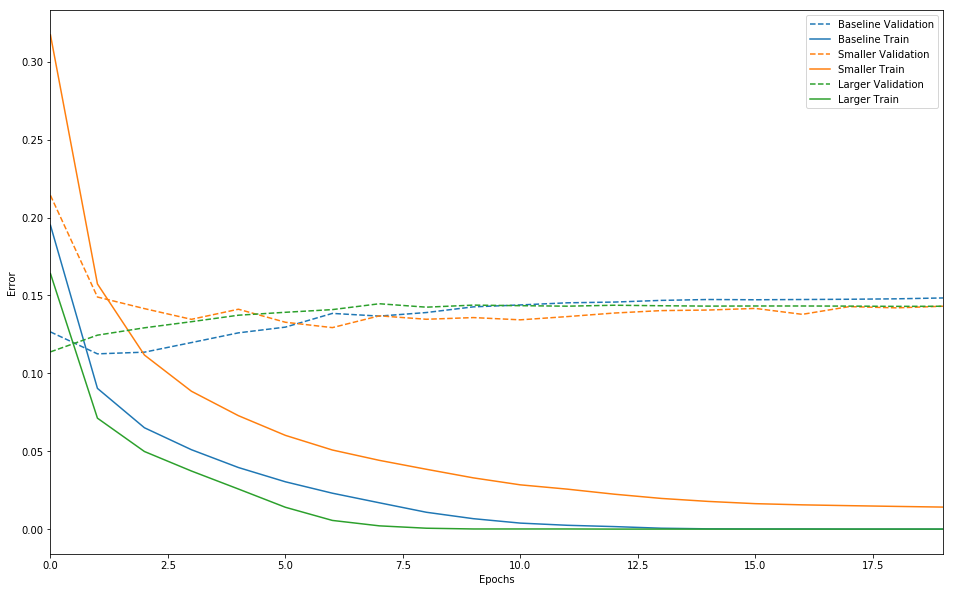

In [10]:
plot_history([('baseline', baseline_history),
              ('smaller',smaller_history),
              ('larger',larger_history)])


# Regularization 

In [18]:
l2_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16,
                       kernel_regularizer=keras.regularizers.l2(0.01), 
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,
                       kernel_regularizer=keras.regularizers.l2(0.01), 
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
l2_history = l2_model.fit(train_data,
                          train_labels,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_labels),
                          verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.7752 - acc: 0.7830 - binary_crossentropy: 0.5465 - val_loss: 0.6026 - val_acc: 0.8606 - val_binary_crossentropy: 0.4107
Epoch 2/20
 - 2s - loss: 0.5408 - acc: 0.8784 - binary_crossentropy: 0.3485 - val_loss: 0.5217 - val_acc: 0.8750 - val_binary_crossentropy: 0.3350
Epoch 3/20
 - 2s - loss: 0.4865 - acc: 0.8869 - binary_crossentropy: 0.3058 - val_loss: 0.4888 - val_acc: 0.8786 - val_binary_crossentropy: 0.3174
Epoch 4/20
 - 2s - loss: 0.4512 - acc: 0.8950 - binary_crossentropy: 0.2857 - val_loss: 0.4702 - val_acc: 0.8784 - val_binary_crossentropy: 0.3136
Epoch 5/20
 - 2s - loss: 0.4296 - acc: 0.8970 - binary_crossentropy: 0.2762 - val_loss: 0.4490 - val_acc: 0.8817 - val_binary_crossentropy: 0.3033
Epoch 6/20
 - 2s - loss: 0.4111 - acc: 0.9024 - binary_crossentropy: 0.2678 - val_loss: 0.4388 - val_acc: 0.8820 - val_binary_crossentropy: 0.3011
Epoch 7/20
 - 2s - loss: 0.3968 - acc: 0.9039 - binary_crossentropy:

In [15]:
l1_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16,
                        kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,
                        kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l1_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

l1_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
l1_history = l1_model.fit(train_data,
                          train_labels,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_labels),
                          verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 1.1129 - acc: 0.7746 - binary_crossentropy: 0.5535 - val_loss: 0.6281 - val_acc: 0.8405 - val_binary_crossentropy: 0.4346
Epoch 2/20
 - 2s - loss: 0.5653 - acc: 0.8539 - binary_crossentropy: 0.3827 - val_loss: 0.5384 - val_acc: 0.8575 - val_binary_crossentropy: 0.3572
Epoch 3/20
 - 2s - loss: 0.5190 - acc: 0.8647 - binary_crossentropy: 0.3371 - val_loss: 0.5222 - val_acc: 0.8605 - val_binary_crossentropy: 0.3404
Epoch 4/20
 - 2s - loss: 0.5024 - acc: 0.8704 - binary_crossentropy: 0.3207 - val_loss: 0.5142 - val_acc: 0.8632 - val_binary_crossentropy: 0.3313
Epoch 5/20
 - 2s - loss: 0.4932 - acc: 0.8728 - binary_crossentropy: 0.3120 - val_loss: 0.4999 - val_acc: 0.8694 - val_binary_crossentropy: 0.3179
Epoch 6/20
 - 2s - loss: 0.4856 - acc: 0.8763 - binary_crossentropy: 0.3045 - val_loss: 0.4971 - val_acc: 0.8698 - val_binary_crossentropy: 0.3158
Epoch 7/20
 - 2s - loss: 0.4844 - acc: 0.8758 - binary_crossentropy:

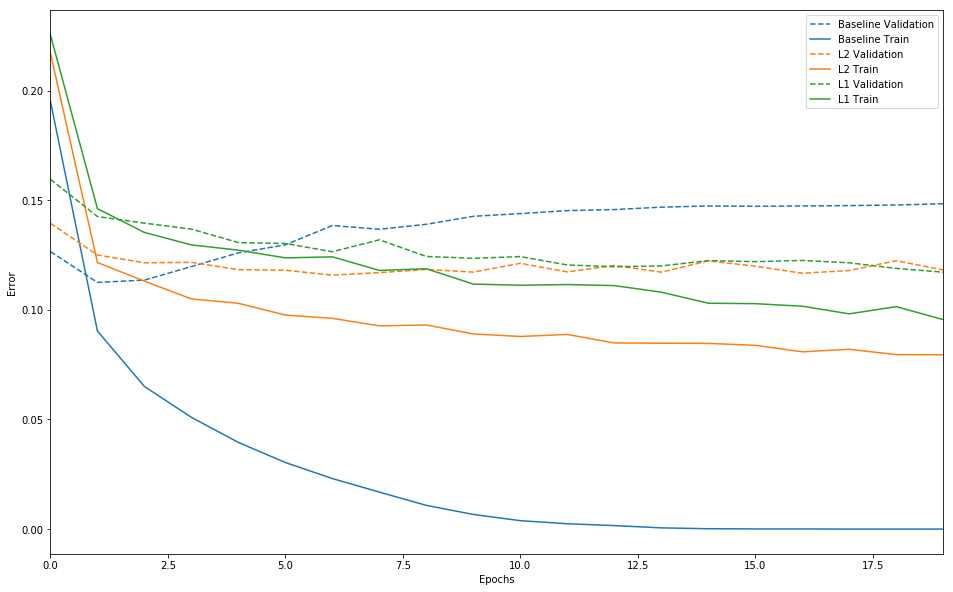

In [20]:
plot_history([('baseline', baseline_history),
              ('l2',l2_history),
              ('l1',l1_history)])


# Dropout

In [23]:
dropout_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dropout_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

dropout_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
dropout_history = dropout_model.fit(train_data,
                          train_labels,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_labels),
                          verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6300 - acc: 0.6379 - binary_crossentropy: 0.6300 - val_loss: 0.4852 - val_acc: 0.8539 - val_binary_crossentropy: 0.4852
Epoch 2/20
 - 2s - loss: 0.4598 - acc: 0.8052 - binary_crossentropy: 0.4598 - val_loss: 0.3466 - val_acc: 0.8821 - val_binary_crossentropy: 0.3466
Epoch 3/20
 - 2s - loss: 0.3575 - acc: 0.8636 - binary_crossentropy: 0.3575 - val_loss: 0.2938 - val_acc: 0.8897 - val_binary_crossentropy: 0.2938
Epoch 4/20
 - 2s - loss: 0.2953 - acc: 0.8944 - binary_crossentropy: 0.2953 - val_loss: 0.2753 - val_acc: 0.8891 - val_binary_crossentropy: 0.2753
Epoch 5/20
 - 2s - loss: 0.2527 - acc: 0.9136 - binary_crossentropy: 0.2527 - val_loss: 0.2732 - val_acc: 0.8889 - val_binary_crossentropy: 0.2732
Epoch 6/20
 - 2s - loss: 0.2217 - acc: 0.9246 - binary_crossentropy: 0.2217 - val_loss: 0.2806 - val_acc: 0.8881 - val_binary_crossentropy: 0.2806
Epoch 7/20
 - 2s - loss: 0.1950 - acc: 0.9332 - binary_crossentropy:

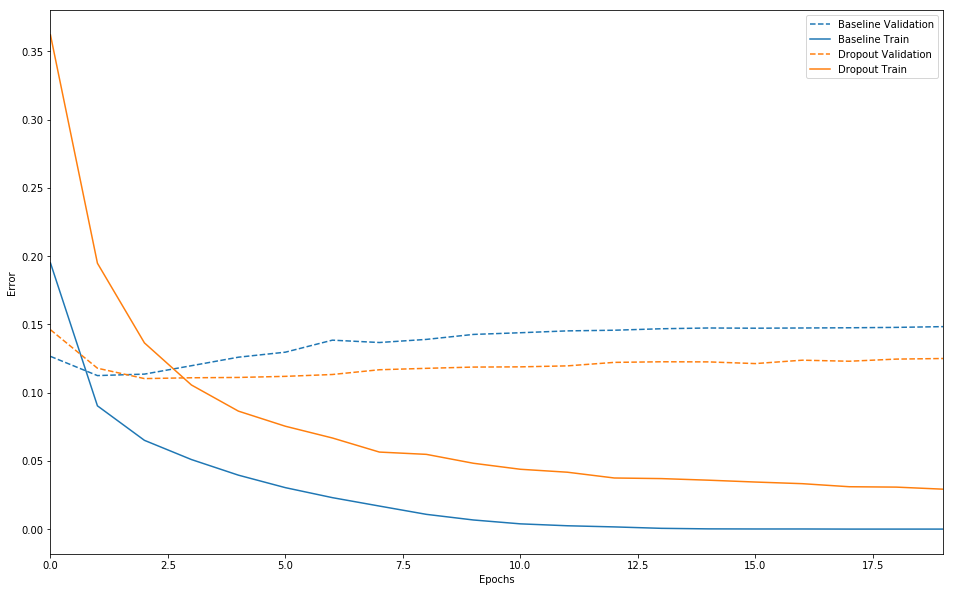

In [27]:
plot_history([('baseline', baseline_history),
              ('dropout',dropout_history)])


# Early stopping


In [41]:
es_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

es_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

es_history = es_model.fit(train_data,
                          train_labels,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_labels),
                          verbose=2, 
                          callbacks=[keras.callbacks.EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=2)])


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.4537 - acc: 0.8136 - binary_crossentropy: 0.4537 - val_loss: 0.3144 - val_acc: 0.8798 - val_binary_crossentropy: 0.3144
Epoch 2/20
 - 2s - loss: 0.2292 - acc: 0.9171 - binary_crossentropy: 0.2292 - val_loss: 0.2855 - val_acc: 0.8865 - val_binary_crossentropy: 0.2855
Epoch 3/20
 - 2s - loss: 0.1694 - acc: 0.9399 - binary_crossentropy: 0.1694 - val_loss: 0.2997 - val_acc: 0.8820 - val_binary_crossentropy: 0.2997
Epoch 4/20
 - 2s - loss: 0.1353 - acc: 0.9532 - binary_crossentropy: 0.1353 - val_loss: 0.3318 - val_acc: 0.8748 - val_binary_crossentropy: 0.3318


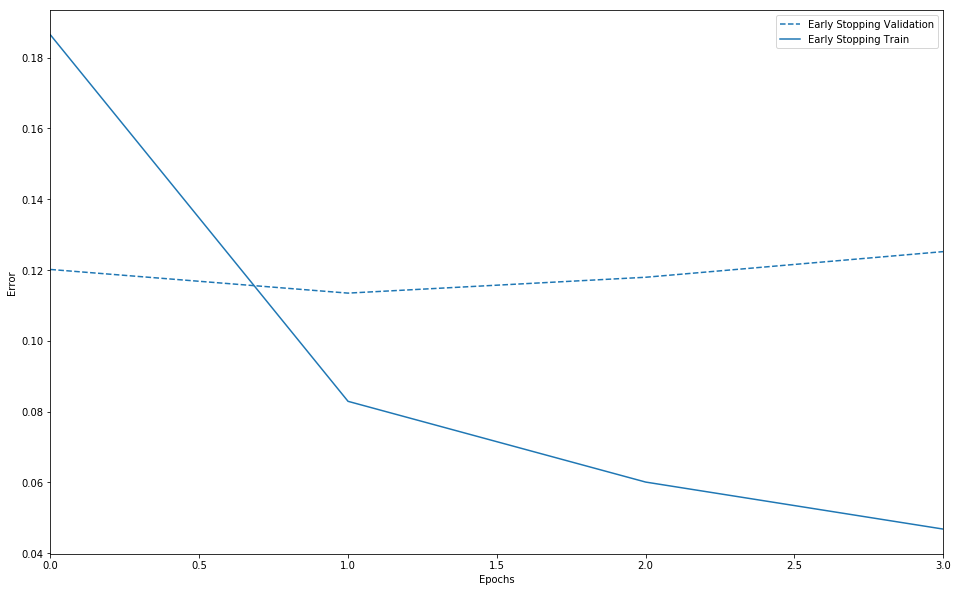

In [42]:
plot_history([('Early Stopping',es_history)])


In [ ]:
from keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test)
 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])
